# 1. Install Dependencies and Setup

In [51]:
import sys
print("Python executable:", sys.executable)

Python executable: C:\Users\Blessing Austin\OneDrive - montclair.edu\Desktop\MSU\SETUP\ImageClassification\imageclassification\Scripts\python.exe


In [ ]:
!pip install tensorflow

In [ ]:
!pip list

In [54]:
import tensorflow as tf
import os

In [101]:
os.listdir('data')

['BIT', 'HYDRO POWER', 'NATURAL GAS', 'SOLAR']

In [56]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [57]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [58]:
tf.config.list_physical_devices('GPU')

[]

# 2. Cleaning Up the Images

In [59]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [60]:
img = cv2.imread(os.path.join('data','BIT','naip_151_AL_BIT.png'))
img.shape

(1114, 1114, 3)

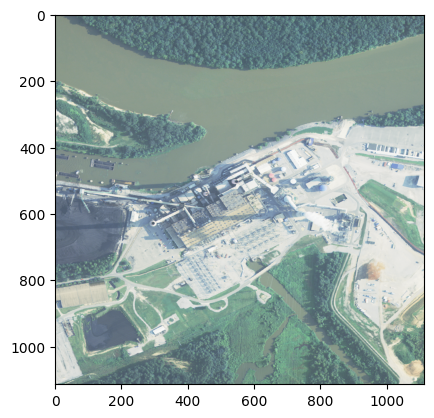

In [62]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [63]:
data_dir = 'data' 

In [64]:
os.listdir(data_dir)

['BIT', 'HYDRO POWER', 'NATURAL GAS', 'SOLAR']

In [ ]:
os.listdir(os.path.join(data_dir,'NATURAL GAS'))

In [65]:
image_exts = ['png']

In [66]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [ ]:
tf.data.Dataset??

In [68]:
import numpy as np

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [99]:
# building the data pipleine
data = tf.keras.utils.image_dataset_from_directory('data')

Found 2204 files belonging to 4 classes.


In [98]:
# accessing the data pipeline by looping
# class
# 0 = BIT
# 1 = hydro
# 2 = NG
# 3 = solar
data_iterator = data.as_numpy_iterator()

In [88]:
batch = data_iterator.next()

In [94]:
batch[0].shape

(32, 256, 256, 3)

In [100]:
batch[1]

array([2, 3, 2, 0, 3, 2, 2, 3, 2, 0, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2,
       3, 2, 2, 2, 3, 3, 2, 2, 3, 3])

In [89]:
# there are two parts to these images: the images and the labels
len(batch)

2

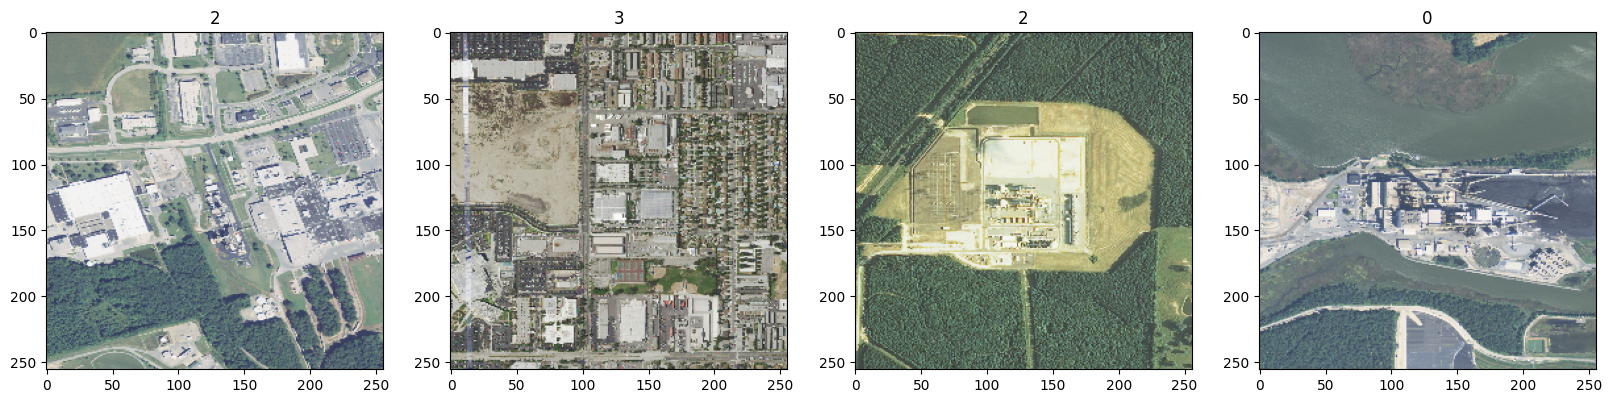

In [90]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [64]:
data = data.map(lambda x,y: (x/255, y))

In [65]:
data.as_numpy_iterator().next()

(array([[[[0.71521   , 0.6926123 , 0.65939444],
          [0.7441359 , 0.7282352 , 0.65124905],
          [0.68097425, 0.6594654 , 0.5847411 ],
          ...,
          [0.3235738 , 0.46842986, 0.390147  ],
          [0.29215154, 0.42464527, 0.3704032 ],
          [0.29458427, 0.44120592, 0.37301564]],
 
         [[0.7625766 , 0.7285887 , 0.6658465 ],
          [0.7021527 , 0.6763999 , 0.60189885],
          [0.45572522, 0.5157403 , 0.45628932],
          ...,
          [0.30390158, 0.4429754 , 0.35611278],
          [0.19449835, 0.28587103, 0.2955058 ],
          [0.34499082, 0.45882353, 0.39607844]],
 
         [[0.6334574 , 0.6029956 , 0.5536083 ],
          [0.57742035, 0.58229166, 0.5294118 ],
          [0.29280803, 0.39720446, 0.36621866],
          ...,
          [0.27151114, 0.40879288, 0.35235128],
          [0.2421735 , 0.3703551 , 0.338527  ],
          [0.3434896 , 0.5007659 , 0.39797795]],
 
         ...,
 
         [[0.27857456, 0.40211996, 0.3643689 ],
          [0.35082

# 5. Split Data

In [66]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [67]:
train_size

48

In [68]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [69]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Input

In [71]:
model = Sequential()

In [77]:
model = Sequential([
    Input(shape=(256, 256, 3)),  # Define the input shape directly using an Input layer
    Conv2D(16, (3, 3), strides=1, activation='relu'),
    MaxPooling2D(),
    Conv2D(32, (3, 3), strides=1, activation='relu'),
    MaxPooling2D(),
    Conv2D(16, (3, 3), strides=1, activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [78]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [80]:
logdir='logs'

In [81]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [82]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 61s 1s/step - accuracy: 0.0000e+00 - loss: -32992.5820 - val_accuracy: 0.0000e+00 - val_loss: -1161404.1250
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.0000e+00 - loss: -8466291.0000 - val_accuracy: 0.0000e+00 - val_loss: -95572448.0000
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 46s 965ms/step - accuracy: 0.0000e+00 - loss: -261404880.0000 - val_accuracy: 0.0000e+00 - val_loss: -1403441280.0000
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.0000e+00 - loss: -2622695936.0000 - val_accuracy: 0.0000e+00 - val_loss: -8808402944.0000
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.0000e+00 - loss: -14361525248.0000 - val_accuracy: 0.0000e+00 - val_loss: -37007589376.0000
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.0000e+00 - loss: -52090007552.0000 - val_accuracy: 0.0000e+00 - val_loss: -115082829824.0000
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 53s 1s/step - accuracy: 0.0000e+00 - loss: -

KeyboardInterrupt: 

# 8. Plot Performance

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

# 10. Test

In [ ]:
import cv2

In [ ]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [ ]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))

In [ ]:
new_model = load_model('imageclassifier.h5')

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))